<center>
<img src="Figures/Dinamica_galaxia.jpg" width=80%>
<h4>
Imagen : https://www.eso.org/public/spain/news/eso1709/
</h4>
</center>

<h1><center>
Dinámica de Galaxias
</center></h1>


<h3>
Juan Carlos Basto Pineda
</h3>

<h3>
Juan Manuel Pacheco Arias  
</h3>
<h3>
Cristian Rolando Carvajal  
</h3>



## Materia Oscura? 



&nbsp;


<center>
<img src="Figures/Rotationcurve_3.jpg" width=70%>
</center>
<h9><center> Imagen = https://archive.briankoberlein.com/2014/08/16/old-model-doesnt-work/.</center></h9>

<center>
<img src="Figures/materia_oscura.png" width=100%>
</center>


-  <span style="color:blue">**Curva de rotación (Masa total)**</span>
-  <span style="color:red">**Fotometria (Masa Estelar)**</span> 
- Mapas de HI (Masa del gas)

## Qué medimos? 


&nbsp;

<center>
<img src="Figures/curva.png" width=70%>
</center>


## Cómo lo medimos? 



<h1><center>Estrellas</center></h1>  | <h1><center>Gas</center></h1> 
- | - 
![alt](Figures/Hubble.jpg) | ![alt](Figures/radio.jpg)

## Tambien con simulaciones!!


&nbsp;


<center>
<img src="Figures/Simulation.jpg" width=70%>
</center>


|<h3><center>Imágenes  </center></h3>  | <h3><center>Mapas de velocidades  </center></h3> | <h3><center>   Mapas de HI </center></h3>|
|- | - | - |
| <img src="Figures/galaxi.jpg" alt="Drawing" style="width: 350px;"/> | <img src="Figures/mapa_velocidades.jpg" alt="Drawing" style="width: 300px;"/> | <img src="Figures/map_HI.png" alt="Drawing" style="width: 350px;"/>

## Estudiemos la componente estelar de la velocidad!
Para ello vamos a usar datos reales de una galaxia, con el fin de obtener el perfil de brillo ya que este caracteriza la velocidad de las estrellas. Con algunas librerías, los datos y algo de matemáticas hagamos ciencia.



In [1]:
#Primero importemos las librerías necesarias para hacer todo el trabajo! 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
from astropy.io import fits
import Brightness_profile as Bp

## Datos!
Vamos a importar los datos para generar la imagen de la galaxia, además de una máscara para no tener problemas con otros objetos. Para ello vamos a recurrir a <span style="color:red">**astropy.io**</span>  (https://docs.astropy.org/en/stable/io/fits/)


&nbsp;


<center>
<img src="Figures/digital-image1.png" width=70%>
</center>



In [2]:
#Importamos los datos
hdul1 = fits.open("ugc1317.fits")
mask1 = fits.open("mask_ugc1317.fits")

In [3]:
#Seleccionamos la matriz que genera la imagen
datos = hdul1[0].data - hdul1[0].data.min()
mascara = mask1[0].data

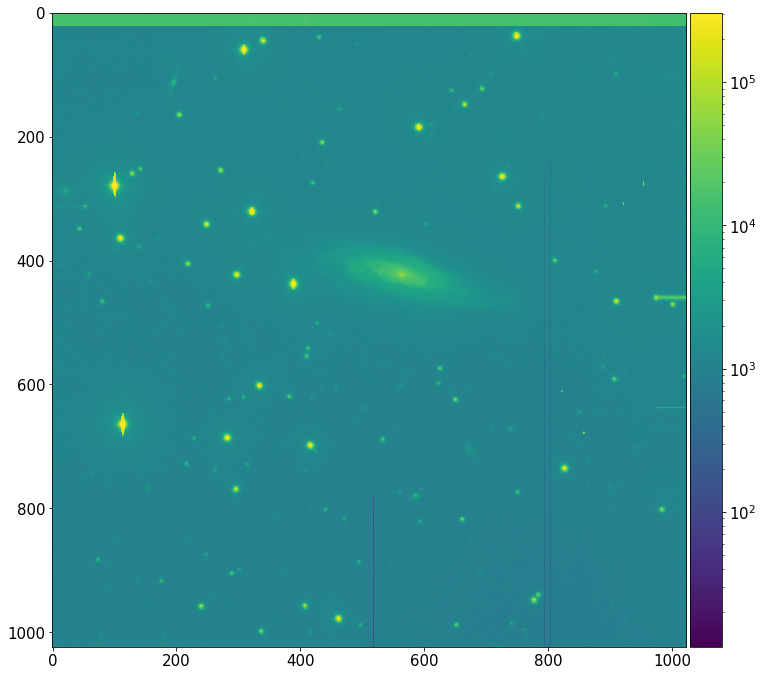

In [4]:
#Visualizamos los datos
Bp.Draw_galaxia(datos,norm = LogNorm())

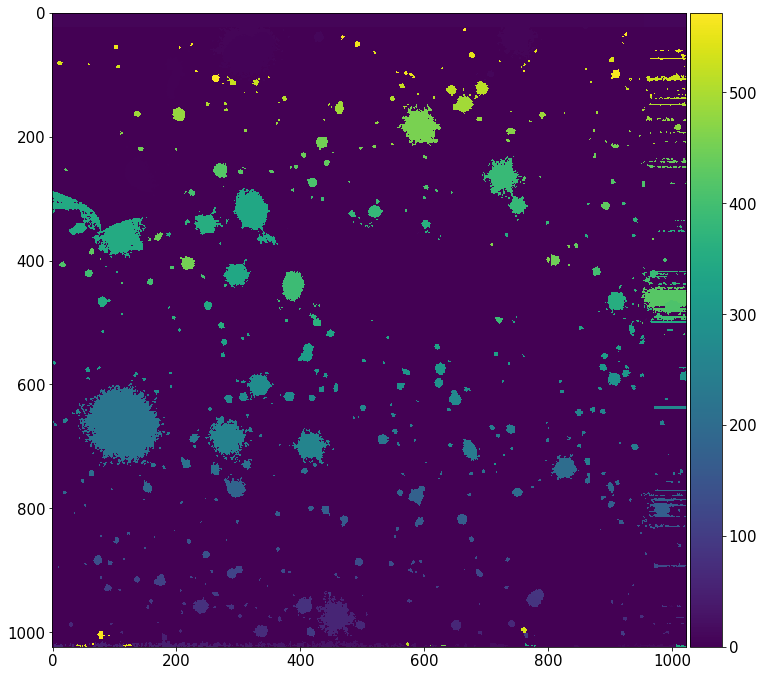

In [12]:
Bp.Draw_galaxia(mascara)

## ¿¿Máscara??
Con la máscara buscamos filtrar los elementos luminosos que pueden dificultar el tratamiento de los datos.


&nbsp;


<center>
<img src="Figures/mask.svg" width=70%>
</center>

In [13]:
#Aplicamos la máscara a los datos 
Mascara = mascara == 0
Data = Mascara * datos 

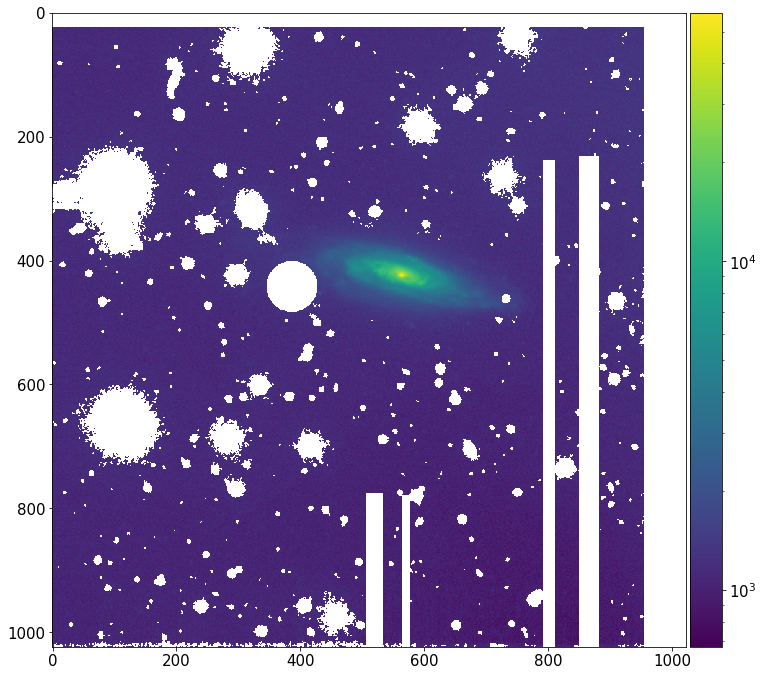

In [7]:
Bp.Draw_galaxia(Data,norm=LogNorm())

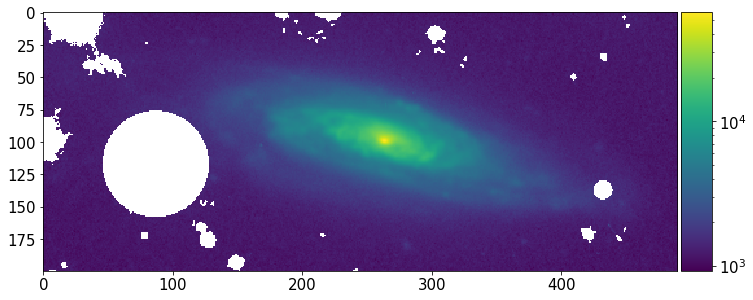

In [14]:
#Ahora seleccionamos solo la sección de los datos donde se encuentra la galaxia 
Data  = Data[325:525,300:790]
Bp.Draw_galaxia(Data,norm=LogNorm())


<center>
<img src="Figures/conver.png" width=70%>
</center>

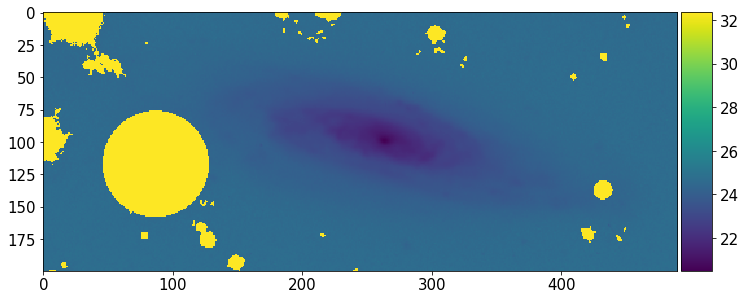

In [15]:
#Ahora para obtener unidades físicas de brillo
Data1 = -2.5*np.log10((Data+1)/(900.25)) + 25
Bp.Draw_galaxia(Data1)

In [16]:
#Caracterización del ruido para no tenerlo en cuenta en el tratamiento 
cielo1 = Data1[25:50,90:115]
cielo2 = Data1[75:100,450:475]
cielo3 = Data1[150:175,0:25]
cielo4 = Data1[175:200,300:325]

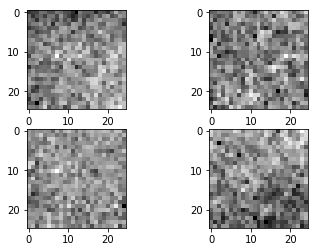

In [17]:
fig, ((ci1, ci2), (ci3,ci4)) = plt.subplots(2, 2)
ci1.imshow(cielo1, cmap=cm.gray_r)
ci2.imshow(cielo2, cmap=cm.gray_r)
ci3.imshow(cielo3, cmap=cm.gray_r)
ci4.imshow(cielo4, cmap=cm.gray_r)

plt.show()

## Histograma

Nos da una idea de la distribución de intensidades en una imagen

&nbsp;



<center>
<img src="Figures/histogram1.jpg" width=70%>
</center>

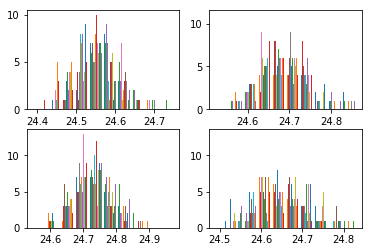

In [18]:

fig, ((c1, c2), (c3,c4)) = plt.subplots(2, 2)

c1.hist(cielo1)
c2.hist(cielo2)
c3.hist(cielo3)
c4.hist(cielo4)

plt.show()

In [20]:
cielo_mean = (cielo1.mean()+cielo2.mean()+cielo3.mean()+cielo4.mean())/4.
cielo_desv = (np.std(cielo1)+np.std(cielo2)+np.std(cielo3)+np.std(cielo4))/4.
minimo_cielo = cielo_mean -3*cielo_desv

## Isofotas y el brillo superficial

Si modelamos una galaxia como un disco y estudiamos el brillo superficial encontraremos una relación con el radio.

<h1><center> $\mu(r) = \mu_o + 1.09\frac{x}{h}$ </h1></center>


 Como no observamos la galaxia de frente, en el caso de que sea un disco, observamos su proyección debido a la inclinación, por tanto vemos que tiene una forma elíptica. 

&nbsp;

<center>
<img src="Figures/ellipses.png" width=70%>
</center>

&nbsp;


Ahora bien, para reconstruir el brillo de la galaxia debemos asociar elipses a contornos con igual intensidad (isofotas) para luego obtener todos los parámetros y construir <span style="color:red">**$\mu(r)$**</span>. 

&nbsp;

<center>
<img src="Figures/iso_galaxi.png" width=70%>
</center>

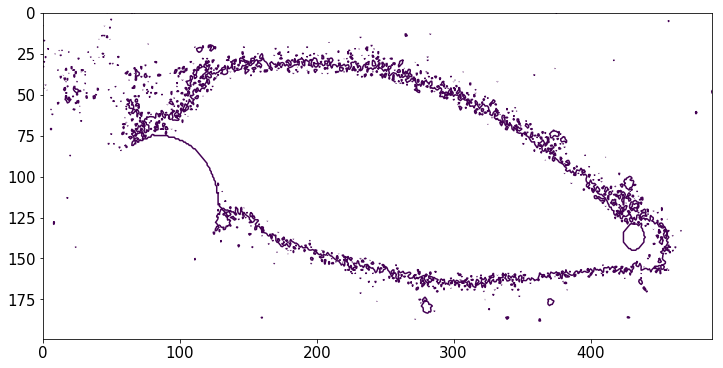

In [22]:
#Visualizamos la primera isofota teniendo en cuenta el ruido de fondo 
Bp.Draw_countour(Data1,minimo_cielo,Data1.min())

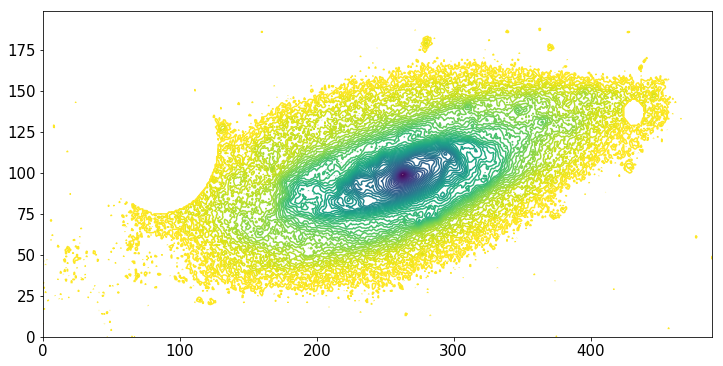

In [23]:
#Ahora lo hacemos para el número de contornos que quieras!
cs = Bp.Draw_countour1(Data1, minimo_cielo, Data1.min(),60)

In [24]:
cs.collections

<a list of 60 mcoll.LineCollection objects>

In [25]:
#Guardamos la información de los puntos (x,y) de los contornos 
listasx,listasy = Bp.points(cs)

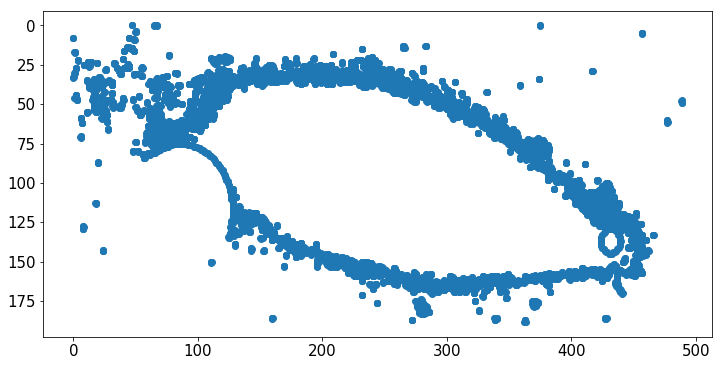

In [26]:
#Gráficamos los puntos (xy), para uno de los contornos 
Bp.Draw_points(listasx,listasy)

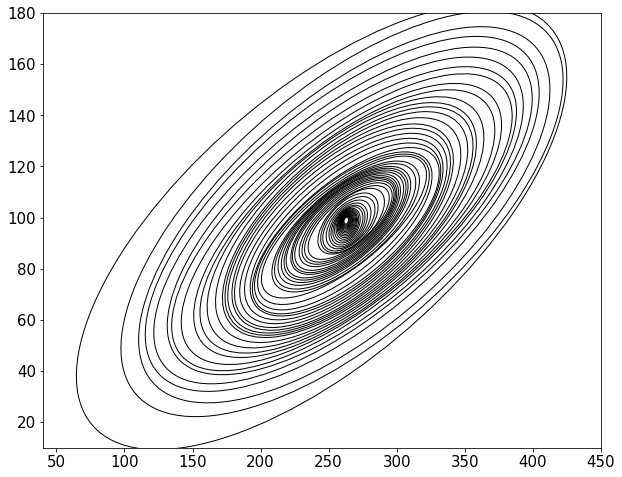

In [27]:
#Ahora ajustamos los datos a la fórmula de la elipse y guardamos los parámetros. Además gráficamos 
Ellip = Bp.ellipses(listasx,listasy)
Bp.Draw_ellipses(Ellip)

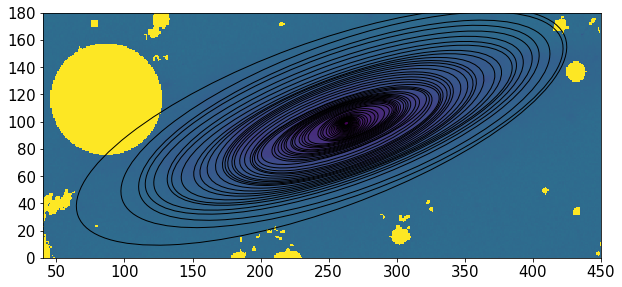

In [28]:
#Gráficamos sobre las elipses sobre la galaxia
Bp.Draw_ellipses_galaxia(Ellip,Data1)

In [29]:
#Obtenemos los promedios del centro de las elipses, las elepticidades, el ángulo de inclinación y además 
#pasamos a unidades físicas los ejes de las elipses
semi_mayor = Ellip[2]*0.4
semi_menor = Ellip[3]*0.4
centrox = Ellip[1][:,:1]*0.4
centroy = Ellip[1][:,1:2]*0.4
elipticidad = (semi_mayor-semi_menor)/(semi_mayor)
angulos = Ellip[4]

promedio_mayor = semi_mayor.mean()
promedio_menor = semi_menor.mean()
promedio_centrox = centrox.mean()
promedio_centroy = centroy.mean()
promedio_e = elipticidad.mean()
promedio_PA = Ellip[4].mean()

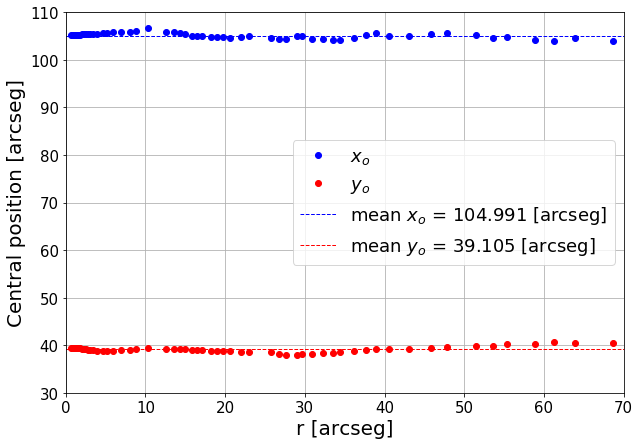

In [22]:
#Gráficamos los centros de todas las elipses junto con los promedio
fig = plt.figure(figsize=(10, 7))
plt.xlabel('r [arcseg]', fontsize = 20)                  
plt.ylabel('Central position [arcseg]', fontsize = 20) 
plt.plot(semi_mayor,centrox,'bo', label='$x_o$')
plt.plot(semi_mayor,centroy,'ro', label='$y_o$')
plt.axhline(promedio_centrox, c='b',linestyle = '--',linewidth = 1 , label='mean $x_o$ = {} [arcseg]'.format(round(promedio_centrox,3)))
plt.axhline(promedio_centroy, c='r',linestyle = '--',linewidth = 1 ,label='mean $y_o$ = {} [arcseg]'.format(round(promedio_centroy,3)))
plt.grid() 
plt.legend(fontsize = 18, loc=0)
plt.axis([0, 70, 30, 110])
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

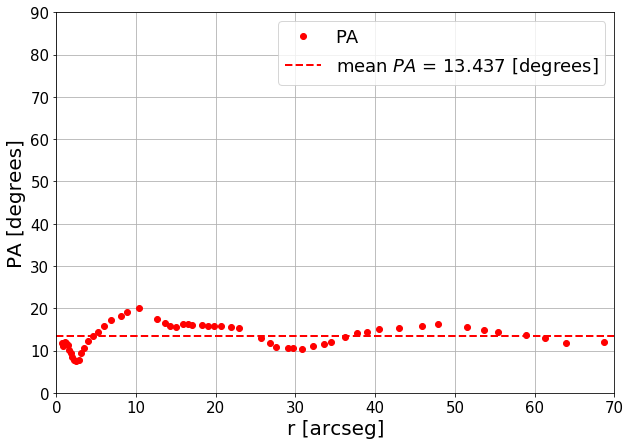

In [30]:
#Gráficamos el ángulo correspondiente a la inclinación de las elipses
fig = plt.figure(figsize=(10, 7))
plt.xlabel('r [arcseg]', fontsize = 20)                  
plt.ylabel('PA [degrees]', fontsize = 20) 
plt.plot(semi_mayor,np.rad2deg(angulos),'ro', label = 'PA')
plt.axhline(np.rad2deg(promedio_PA),c='r',linestyle = '--',linewidth = 2 , label='mean $PA$ = {} [degrees]'.format(round(np.rad2deg(promedio_PA),3)))
plt.axis([0, 70, 0, 90])
plt.grid() 
plt.legend(fontsize = 18, loc=0)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

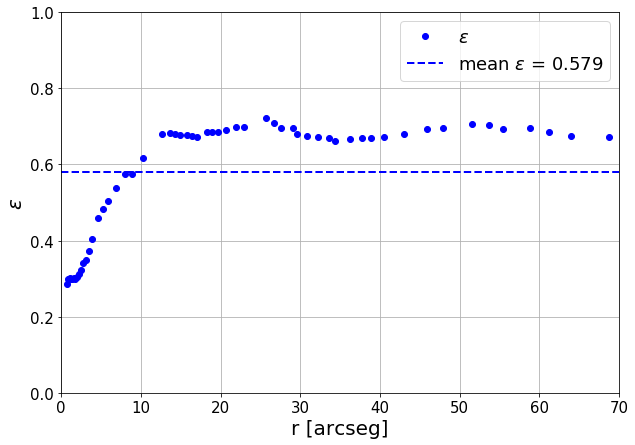

In [24]:
#Gráficamos la elipticidad
fig = plt.figure(figsize=(10, 7))
plt.xlabel('r [arcseg]', fontsize = 20)                  
plt.ylabel('$\epsilon$', fontsize = 20) 
plt.plot(semi_mayor,elipticidad,'bo', label='$\epsilon$')
plt.axhline(promedio_e,c='b',linestyle = '--',linewidth = 2 , label='mean $\epsilon$ = {}'.format(round(promedio_e,3)))
plt.axis([0, 70, 0, 1])
plt.grid()
plt.legend(fontsize = 18, loc=0)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [31]:
#Ahora, pasamos a obtener las intensidades de las isofotas  
Intensidad = np.linspace(Data1.min(),minimo_cielo,len(semi_mayor))
areas = np.pi*semi_menor*semi_mayor

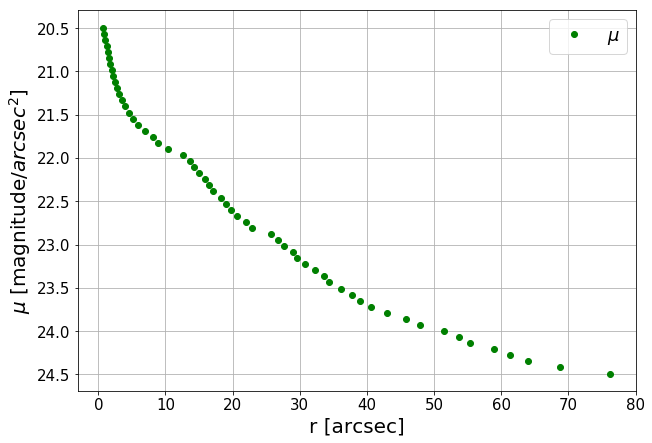

In [32]:
#Gráficamos la densidad de brillo superficial respecto al semi eje mayor
fig = plt.figure(figsize=(10, 7))
plt.xlabel('r [arcsec]', fontsize = 20)                  
plt.ylabel('$\mu$ [magnitude/$arcsec^2$]', fontsize = 20) 
plt.plot(semi_mayor,Intensidad,'go', label='$\mu$')
plt.gca().invert_yaxis() 
plt.grid()
plt.legend(fontsize = 18, loc=0)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [33]:
#Obtenemos los parámetros haciendo un fit
regration = Bp.mu(semi_mayor,Intensidad,20)
[xfit_disk, yfit_disk, muo, h] =  regration

[21.18556789 19.50766899]


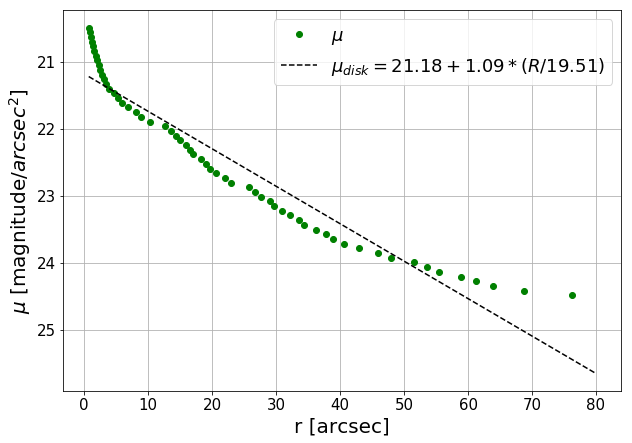

In [40]:
#Gráficamos la densidad superficial de brillo junto con la regresión 
fig = plt.figure(figsize=(10, 7))
plt.xlabel('r [arcsec]', fontsize = 20)                  
plt.ylabel('$\mu$ [magnitude/$arcsec^2$]', fontsize = 20) 
plt.plot(semi_mayor,Intensidad,'go', label='$\mu$')
plt.plot(xfit_disk,yfit_disk,'k--', markersize=1 , label='$\mu_{disk} = 21.18 + 1.09*(R/19.51)$')
plt.gca().invert_yaxis() 
plt.grid()
plt.legend(fontsize = 18, loc=0)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [46]:
#Obtenemos el modelo de la galaxia 
imagen = Bp.Image_galaxi(promedio_centrox, promedio_centroy, Data1, minimo_cielo, promedio_PA,Intensidad,semi_mayor, semi_menor)

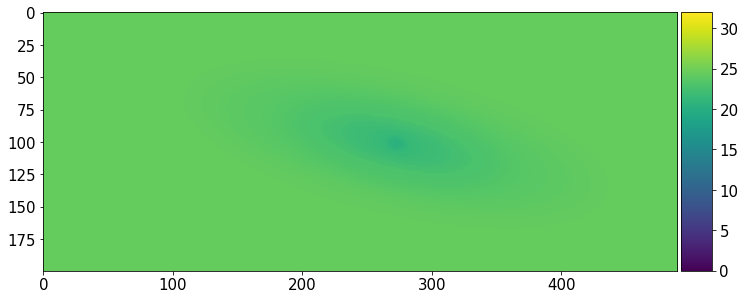

In [47]:
#Gráficamos el modelo
Bp.Draw_galaxia(imagen,Scale=[0,32])

<center>
<img src="Figures/Modelo_galaxia.png" width=70%>
</center>

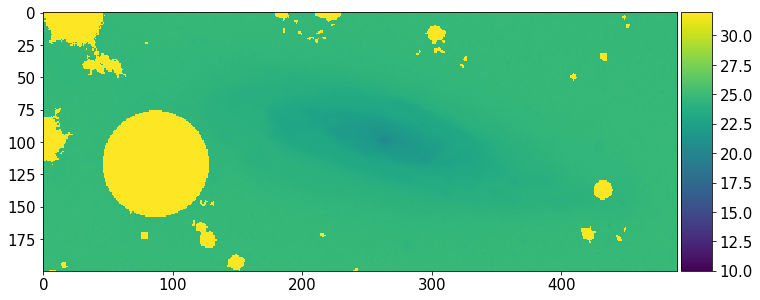

In [60]:
#Gráficamos la galaxia real
Bp.Draw_galaxia(Data1,Scale=[0,32])

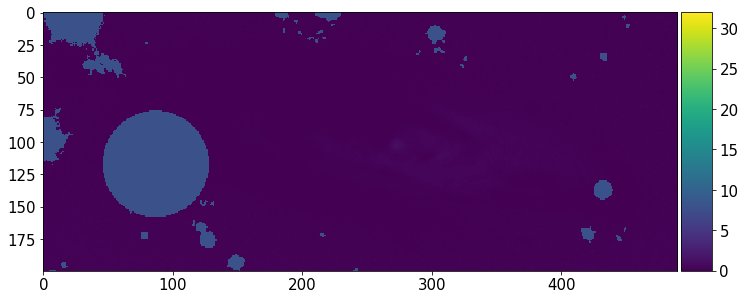

In [51]:
#Finalmente obtenemos un excelente residuo
Bp.Draw_galaxia(Data1-imagen, Scale=[0,32])

<center>
<img src="Figures/residuo.png" width=70%>
</center>

In [52]:
#Obtenemos la densidad superficial de masa 
SDBP = Bp.SDBP(xfit_disk,muo,h,1)

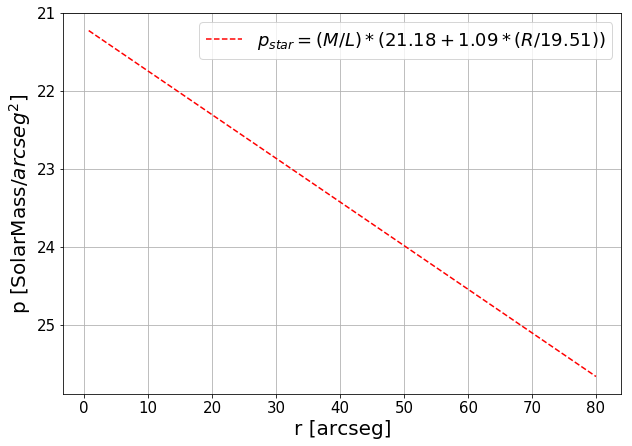

In [53]:
#Graficamos el resultado
fig = plt.figure(figsize=(10, 7))
plt.xlabel('r [arcseg]', fontsize = 20)                  
plt.ylabel('p [SolarMass/$arcseg^2$]', fontsize = 20) 
plt.plot(xfit_disk,SDBP,'r--', markersize=1 , label='$ p_{star} = (M/L)*(21.18 + 1.09*(R/19.51))$')
plt.gca().invert_yaxis() 
plt.grid()
plt.legend(fontsize = 18, loc=0)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()